### **Intent Recognition with BERT using TensorFlow**

In this notebook, we will use pre-trained deep learning model to process some text. We will then use the output of that model to classify the intent. And we will calssify each sentence as intent type using Our tune -Model.

#### After that I'm going to  use ktrain library to do same task. Finally, We are going to compare the both  accuracy.

**Introduction**
Recognizing intent (IR) from text is very useful these days. Usually, you get a short text (sentence or two) and have to classify it into one (or multiple) categories.

### DATA
The data contains various user queries categorized into seven intents. It is hosted on Github https://github.com/sonos/nlu-benchmark/tree/master/2017-06-custom-intent-enginesHub and is first presented in this paperhttps://arxiv.org/abs/1805.10190.

### **BERT**
**Bidirectional Encoder Representations from Transformers (BERT)** is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches.

**BERT** is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications.

## **Why BERT**

1. **Accurate**

2. **Can be used for wide variety of task**

3. **Easy to use**

4. **It is game changer in NLP**

### **Objective**
1. What is Bert
2. What is ktrain Library
3. Downold Pre-Trained bert
4. Unzip Pre-Trained Bert
5. Pre-Processing
6. Develop Model
7. Compile The Model
8. Model Evaluation
9. Install ktrain
10. develop model using ktrain
11. find the Accuracy of each model
12. comparison 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


If you want to get more intiution please read this articale:http://jalammar.github.io/illustrated-bert/
Visual Guide to Using BERT:
http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

In [38]:

import os
import math
import datetime

import pandas as pd 
import numpy as np

#Ploting usages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
import seaborn as sns
from pylab import rcParams
%matplotlib inline

#Tensorflow framework
import tensorflow as tf
from tensorflow import keras

**Downold the dataset and convert into csv fromat**

In [5]:
!gdown --id 1OlcvGWReJMuyYQuOZm149vHWwPtlboR6 --output train.csv
!gdown --id 1Oi5cRlTybuIF2Fl5Bfsr-KkqrXrdt77w --output valid.csv
!gdown --id 1ep9H6-HvhB4utJRLVcLzieWNUSG3P_uF --output test.csv

Downloading...
From: https://drive.google.com/uc?id=1OlcvGWReJMuyYQuOZm149vHWwPtlboR6
To: /content/train.csv
100% 799k/799k [00:00<00:00, 12.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Oi5cRlTybuIF2Fl5Bfsr-KkqrXrdt77w
To: /content/valid.csv
100% 43.3k/43.3k [00:00<00:00, 5.90MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ep9H6-HvhB4utJRLVcLzieWNUSG3P_uF
To: /content/test.csv
100% 43.1k/43.1k [00:00<00:00, 6.23MB/s]


**We will load the data into data frames**

In [6]:
train=pd.read_csv("train.csv")
validation=pd.read_csv("valid.csv")
test=pd.read_csv("test.csv")

### **Merge train and validation dataset**

In [7]:
train=train.append(validation).reset_index(drop=True)

In [8]:
train.head()

,text,intent
0,listen to westbam alumb allergic on google music,PlayMusic
1,add step to me to the 50 clásicos playlist,AddToPlaylist
2,i give this current textbook a rating value of...,RateBook
3,play the song little robin redbreast,PlayMusic
4,please add iris dement to my playlist this is ...,AddToPlaylist


In [9]:
print("shape of the train dataset is "+str(train.shape))
print("shape of the test dataset is "+str(test.shape))

shape of the train dataset is (13784, 2)
shape of the test dataset is (700, 2)


### **Ploting the label Intent**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


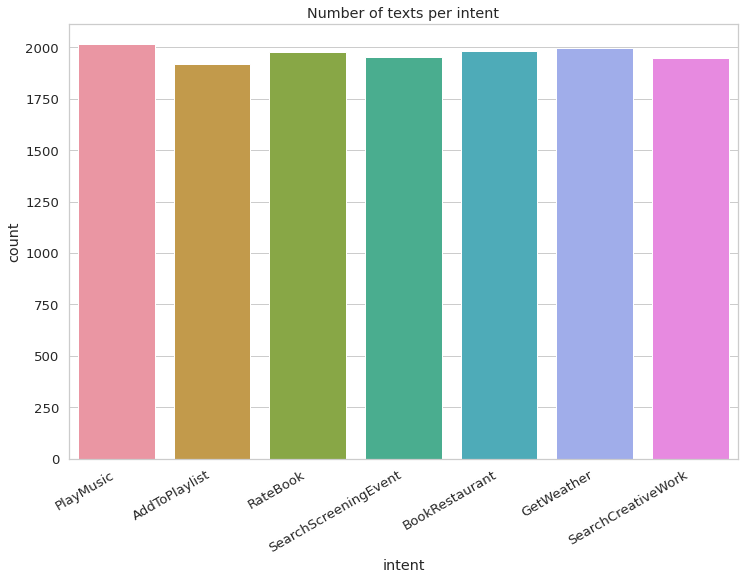

In [10]:
sns.set(style='whitegrid', palette='spring', font_scale=1.2)
rcParams['figure.figsize'] = 12, 8
fig=sns.countplot(train.intent)
plt.title("Number of texts per intent")
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, horizontalalignment='right');



### Implementation of Bert

In [ ]:
!pip install bert-for-tf2

In [12]:
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

### **Downloading one of the simpler pre-trained models**

In [14]:

!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip

--2021-04-29 07:49:23--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 142.250.65.80, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip.1’

uncased_L-12_H-768_ 100%[===================>] 388.84M   283MB/s    in 1.4s    

2021-04-29 07:49:24 (283 MB/s) - ‘uncased_L-12_H-768_A-12.zip.1’ saved [407727028/407727028]



### **Unzip Pre-Trained Model**

In [15]:
!unzip uncased_L-12_H-768_A-12.zip

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


### **Create newfolder in Google-Colab & Save pre-Trained model**

In [17]:
os.makedirs('model',exist_ok=True)
!mv uncased_L-12_H-768_A-12/ model

mv: cannot stat 'uncased_L-12_H-768_A-12/': No such file or directory


### **Specify the Model name**

In [18]:
bert_model_name="uncased_L-12_H-768_A-12"

bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

### **Preprocessing**

We need to convert the texts into vectors. Then only we can feed into our BERT model.Whic preprocessing steps are: 
1. Tokenize the text
2. Convert the sequence of tokens into numbers
3. Pading the sequences 


In [19]:
!pip install tqdm 

In [20]:
from tqdm import tqdm

### **Padding**

**After tokenization, tokenized is a list of sentences -- each sentences is represented as a list of tokens. We want BERT to process our examples all at once (as one batch). It's just faster that way. For that reason, we need to pad all lists to the same size, so we can represent the input as one 2-d array, rather than a list of lists (of different lengths).**

In [21]:
class intent_classification:
  text_column = "text"
  intent_column = "intent"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    train, test = map(lambda df: df.reindex(df[intent_classification.text_column].str.len().sort_values().index), [train, test])
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[intent_classification.text_column], row[intent_classification.intent_column]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)

In [22]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))

In [23]:
tokenizer.tokenize("I can't wait to visit Germany again!")

['i', 'can', "'", 't', 'wait', 'to', 'visit', 'germany', 'again', '!']

In [24]:
tokens = tokenizer.tokenize("I can't wait to visit Bulgaria again!")
tokenizer.convert_tokens_to_ids(tokens)

[1045, 2064, 1005, 1056, 3524, 2000, 3942, 8063, 2153, 999]

### **Fine-tuning BERT model**

In [25]:
def create_model(max_seq_len, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))

  load_stock_weights(bert, bert_ckpt_file)
        
  return model

### **Training The Model**

In [26]:

!pip install sentencepiece

     |████████████████████████████████| 1.2MB 24.3MB/s 


In [27]:
!nvidia-smi

Thu Apr 29 07:50:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
classes = train.intent.unique().tolist()
data = intent_classification(train, test, tokenizer, classes, max_seq_len=128)

13784it [00:03, 4010.93it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
700it [00:00, 4022.44it/s]


max seq_len 38


In [29]:
print("After tokenization and padding train_x shape is"+str( data.train_x.shape))
print("After tokenization and padding train_y shape is"+str( data.train_y.shape))
print("After tokenization and padding test_x shape is"+str( data.train_x.shape))
print("After tokenization and padding test_y shape is"+str( data.train_y.shape))

After tokenization and padding train_x shape is(13784, 38)
After tokenization and padding train_y shape is(13784,)
After tokenization and padding test_x shape is(13784, 38)
After tokenization and padding test_y shape is(13784,)


In [30]:
data.train_x[0]

array([ 101, 2377, 3769,  102,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

In [56]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 38, 768)
Done loading 196 BERT weights from: model/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7fe08c4f97d0> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [57]:

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 38)]              0         
_________________________________________________________________
bert (BertModelLayer)        (None, 38, 768)           108890112 
_________________________________________________________________
lambda_1 (Lambda)            (None, 768)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 768)               590592    
_________________________________________________________________
dropout_3 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 5383

In [58]:
model.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [60]:
log_dir = "log/intent_detection/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_split=0.1,
  batch_size=16,
  shuffle=True,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2
776/776 [==============================] - 259s 334ms/step - loss: 0.0566 - acc: 0.9842 - val_loss: 0.0210 - val_acc: 0.9971
Epoch 2/2
776/776 [==============================] - 258s 333ms/step - loss: 0.0352 - acc: 0.9889 - val_loss: 0.0168 - val_acc: 0.9978


In [61]:
model.save('/content/drive/My Drive/bert_model')

In [35]:
import pickle

### **Evaluation**

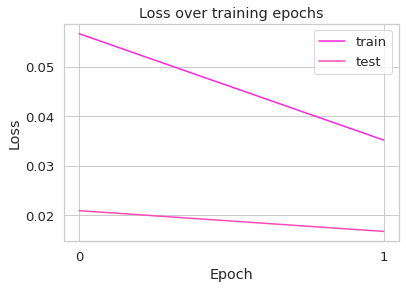

In [62]:
# %load_ext tensorboard
# %tensorboard --logdir log
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

In [64]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

22/22 [==============================] - 2s 90ms/step - loss: 0.0874 - acc: 0.9786
train acc 0.9957922101020813
test acc 0.9785714149475098


In [68]:
y_pred = model.predict(data.test_x).argmax(axis=-1)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(data.test_y, y_pred, target_names=classes))

                      precision    recall  f1-score   support

           PlayMusic       0.97      0.99      0.98        86
       AddToPlaylist       1.00      1.00      1.00       124
            RateBook       1.00      1.00      1.00        80
SearchScreeningEvent       0.99      0.92      0.95       107
      BookRestaurant       0.99      1.00      0.99        92
          GetWeather       1.00      0.99      1.00       104
  SearchCreativeWork       0.91      0.96      0.94       107

            accuracy                           0.98       700
           macro avg       0.98      0.98      0.98       700
        weighted avg       0.98      0.98      0.98       700



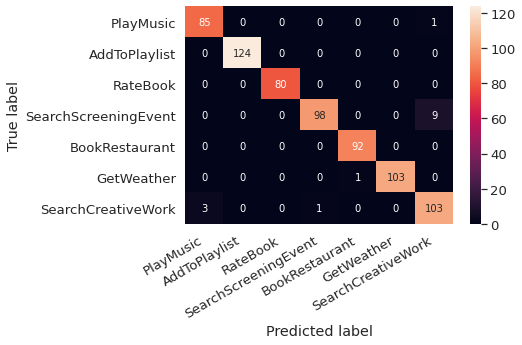

In [70]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [71]:
sentences = [
  "Play our song now",
  "Rate this book as awful"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = model.predict(pred_token_ids).argmax(axis=-1)

for text, label in zip(sentences, predictions):
  print("text:", text, "\nintent:", classes[label])
  print()

text: Play our song now 
intent: PlayMusic

text: Rate this book as awful 
intent: RateBook



### **Try intent prediction using  ktrain**

In [ ]:
!pip install ktrain

In [43]:
import ktrain
from ktrain import text

In [44]:
(X_train,y_train),(X_test,y_test),preprocess=text.texts_from_df(train_df=train,
                                                                   text_column = 'text',
                                                                   label_columns = 'intent',
                                                                   val_df =test,
                                                                   maxlen = 64,
                                                                   preprocess_mode = 'bert')

['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'PlayMusic', 'RateBook', 'SearchCreativeWork', 'SearchScreeningEvent']
   AddToPlaylist  BookRestaurant  ...  SearchCreativeWork  SearchScreeningEvent
0            0.0             0.0  ...                 0.0                   0.0
1            1.0             0.0  ...                 0.0                   0.0
2            0.0             0.0  ...                 0.0                   0.0
3            0.0             0.0  ...                 0.0                   0.0
4            1.0             0.0  ...                 0.0                   0.0

[5 rows x 7 columns]
['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'PlayMusic', 'RateBook', 'SearchCreativeWork', 'SearchScreeningEvent']
   AddToPlaylist  BookRestaurant  ...  SearchCreativeWork  SearchScreeningEvent
0            1.0             0.0  ...                 0.0                   0.0
1            0.0             1.0  ...                 0.0                   0.0
2            1.0

Is Multi-Label? False
preprocessing test...
language: en


In [46]:
model = text.text_classifier(name = 'bert',
                             train_data= (X_train, y_train),
                             preproc= preprocess,metrics=['accuracy'])

Is Multi-Label? False
maxlen is 64
done.


In [47]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 64)

### **Finding the Optimal Learning Rate**

**It might take few hours to complete this task**

In [ ]:
# learner.lr_find()
# learner.lr_plot()

In [51]:
learner.fit_onecycle(lr = 2e-5, epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
216/216 [==============================] - 212s 982ms/step - loss: 0.0259 - accuracy: 0.9937 - val_loss: 0.0925 - val_accuracy: 0.9743
Epoch 2/2
216/216 [==============================] - 217s 1s/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.0747 - val_accuracy: 0.9771


In [75]:
bert_predictor = ktrain.get_predictor(learner.model, preprocess)

In [53]:
bert_predictor.save('/content/drive/My Drive/bert2')

In [79]:
learner.validate(class_names=preprocess.get_classes())

                      precision    recall  f1-score   support

       AddToPlaylist       0.99      0.99      0.99       124
      BookRestaurant       0.98      1.00      0.99        92
          GetWeather       1.00      0.98      0.99       104
           PlayMusic       0.96      0.99      0.97        86
            RateBook       1.00      1.00      1.00        80
  SearchCreativeWork       0.92      0.97      0.95       107
SearchScreeningEvent       1.00      0.92      0.96       107

            accuracy                           0.98       700
           macro avg       0.98      0.98      0.98       700
        weighted avg       0.98      0.98      0.98       700



array([[123,   0,   0,   1,   0,   0,   0],
       [  0,  92,   0,   0,   0,   0,   0],
       [  0,   2, 102,   0,   0,   0,   0],
       [  1,   0,   0,  85,   0,   0,   0],
       [  0,   0,   0,   0,  80,   0,   0],
       [  0,   0,   0,   3,   0, 104,   0],
       [  0,   0,   0,   0,   0,   9,  98]])

In [81]:
bert_predictor.predict(new_data)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:215: UserWarning: List or array of two texts supplied, so task being treated as text classification. If this is a sentence pair classification task, please cast to tuple.
  warnings.warn('List or array of two texts supplied, so task being treated as text classification. ' +\


['PlayMusic', 'RateBook']

In [72]:
new_data = ["Play our song now",
  "Rate this book as awful"]

In [87]:
new_data1=[ "I met a Dutch girl with inflatable shoes last week, phoned her up to arrange a date but unfortunately she'd popped her clogs.",
            "So I said 'Do you want a game of Darts?' He said, 'OK then', I said nearest to bull starts'. He said, 'Baa', I said, 'Moo', he said, You're closest'.",
            "The other day I sent my girlfriend a huge pile of snow. I rang her up; I said 'Did you get my drift?'",
              "So I went down the local supermarket"]

In [88]:
bert_predictor.predict(new_data1)

['BookRestaurant',
 'SearchCreativeWork',
 'SearchCreativeWork',
 'BookRestaurant']

### **Conclussion**

### **Comparision of BERT vs ktrain**

Here, **ktrain** is the free library for doing deep learning work quickly &  faster than the manual method. It will help to find the optimal learning rate very effectively. Further, Both accuracy is more or less the same.